In [1]:
import pandas as pd
import urllib.request
from PIL import Image
import seaborn as sns

In [2]:
diamantes = pd.read_csv("DiamondsPrices2022.csv")

In [3]:
diamantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamantes.describe(include="all")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943,53943,53943,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13067,NaN,NaN,NaN,NaN,NaN,NaN
mean,26972.000000,0.797935,NaN,NaN,NaN,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,NaN,NaN,NaN,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000


In [5]:
diamantes.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
diamantes["clarity"].value_counts(normalize=True)

clarity
SI1     0.242237
VS2     0.227258
SI2     0.170439
VS1     0.151475
VVS2    0.093914
VVS1    0.067757
IF      0.033183
I1      0.013737
Name: proportion, dtype: float64

In [7]:
diamantes.drop(['Unnamed: 0'], axis=1, inplace=True)

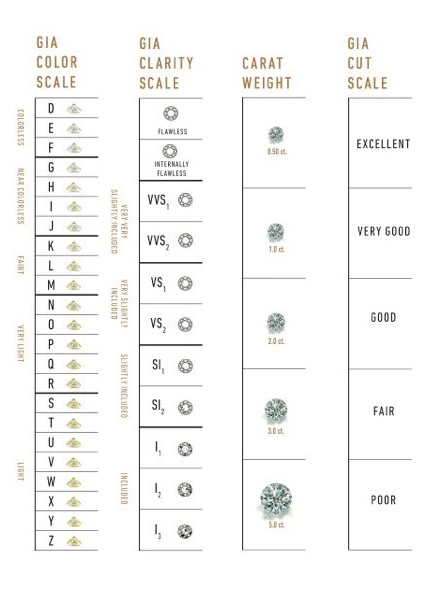

In [8]:
diamantes['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [9]:
diamantes['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
diamantes['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
diamantes.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
diamantes.mode()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


In [13]:
diamantes = diamantes.replace({'clarity': {"IF":7, "VVS1": 6, "VVS2": 5, "VS1": 4, "VS2": 3, "SI1": 2, "SI2": 1, "I1": 0}})

C:\Users\shirl\AppData\Local\Temp\ipykernel_13888\477035910.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diamantes = diamantes.replace({'clarity': {"IF":7, "VVS1": 6, "VVS2": 5, "VS1": 4, "VS2": 3, "SI1": 2, "SI2": 1, "I1": 0}})


In [14]:
diamantes['clarity'].unique()

array([1, 2, 4, 3, 5, 6, 0, 7], dtype=int64)

In [15]:
diamantes = diamantes.replace({'cut': {"Fair":0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}})

C:\Users\shirl\AppData\Local\Temp\ipykernel_13888\1024795902.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diamantes = diamantes.replace({'cut': {"Fair":0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}})


In [16]:
diamantes['cut'].unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [17]:
diamantes = diamantes.replace({'color': {"D": 6, "E": 5, "F": 4, "G": 3, "H": 2, "I": 1, "J":0}})

C:\Users\shirl\AppData\Local\Temp\ipykernel_13888\2452364888.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diamantes = diamantes.replace({'color': {"D": 6, "E": 5, "F": 4, "G": 3, "H": 2, "I": 1, "J":0}})


In [18]:
diamantes['color'].unique()

array([5, 1, 0, 2, 4, 3, 6], dtype=int64)

In [19]:
diamantes

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,4,6,1,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,5,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,4,2,59.8,62.0,2756,5.74,5.73,3.43


In [20]:
X = diamantes.drop(["price","cut", "color", "depth", "table" , "x", "y", "z"], axis=1)
y = diamantes['price']
X.shape

(53943, 2)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1889)

#### **Un modelo**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rnd_frt = RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_leaf=5, random_state=18)
rnd_frt.fit(X_train, y_train)
y_pred_rf = rnd_frt.predict(X_test)

In [ ]:
rnd_frt
#tiempo: 26.6 seg

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       random_state=18)

In [ ]:
#0.012 con 2 profundidad y min leaf 5, estimators: 50

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, multilabel_confusion_matrix


In [32]:
predictions = rnd_frt.predict(X_test)
print(accuracy_score(y_test, predictions))

0.010999196687882346


In [28]:
accuracy_score(y_train, rnd_frt.predict(X_train))

0.012023305084745762

In [33]:
multilabel_confusion_matrix(y_test, predictions)

array([[[16182,     0],
        [    1,     0]],

       [[16181,     0],
        [    2,     0]],

       [[16182,     0],
        [    1,     0]],

       ...,

       [[16181,     0],
        [    2,     0]],

       [[16182,     0],
        [    1,     0]],

       [[16182,     0],
        [    1,     0]]], dtype=int64)

### **Otro**

In [35]:
X2 = diamantes.drop(["price","cut", "depth", "table" , "x", "y", "z"], axis=1)
y2 = diamantes['price']

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1889)

In [37]:
rnd_frt_2 = RandomForestClassifier(n_estimators=500, max_depth=2, min_samples_leaf=5, random_state=18)
rnd_frt_2.fit(X_train2, y_train2)
y_pred_rf_2 = rnd_frt_2.predict(X_test2)

In [39]:
predictions2 = rnd_frt_2.predict(X_test2)
print(accuracy_score(y_test2, predictions2))

0.014181110390212253


In [40]:
accuracy_score(y_train2, rnd_frt_2.predict(X_train2))

0.0155026185289892

In [41]:
multilabel_confusion_matrix(y_test2, predictions2)

array([[[10788,     0],
        [    1,     0]],

       [[10787,     0],
        [    2,     0]],

       [[10788,     0],
        [    1,     0]],

       ...,

       [[10788,     0],
        [    1,     0]],

       [[10787,     0],
        [    2,     0]],

       [[10788,     0],
        [    1,     0]]], dtype=int64)

### **Otro**

In [46]:
X3 = diamantes.drop(["price", "x", "y", "z"], axis=1)
y3 = diamantes['price']

In [47]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1889)

In [48]:
rnd_frt_3 = RandomForestClassifier(n_estimators=500, max_depth=2, min_samples_leaf=5, random_state=18)
rnd_frt_3.fit(X_train3, y_train3)
y_pred_rf_3 = rnd_frt_3.predict(X_test3)

In [49]:
predictions3 = rnd_frt_3.predict(X_test3)
print(accuracy_score(y_test3, predictions3))

0.01455185837427009


In [50]:
accuracy_score(y_train3, rnd_frt_3.predict(X_train3))

0.016753950966306715

In [51]:
multilabel_confusion_matrix(y_test2, predictions2)

array([[[10788,     0],
        [    1,     0]],

       [[10787,     0],
        [    2,     0]],

       [[10788,     0],
        [    1,     0]],

       ...,

       [[10788,     0],
        [    1,     0]],

       [[10787,     0],
        [    2,     0]],

       [[10788,     0],
        [    1,     0]]], dtype=int64)

### **Otro**

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_5 = diamantes.drop(columns=["price", "depth", "table"])
y_5 = diamantes["price"]

n_bins = 5  
bin_edges = np.linspace(y_5.min(), y.max(), n_bins + 1)
y_binned = np.digitize(y_5, bins=bin_edges[1:-1])

train_set5, test_set5, train_y_set5, test_y_set5 = train_test_split(X_5, y_binned, test_size=0.2, random_state=1889)

arbol_cls_5 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1889)
arbol_cls_5.fit(train_set5, train_y_set5)

predictions_5 = arbol_cls_5.predict(test_set5)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rnd_frt_5 = RandomForestClassifier(n_estimators=5000, max_depth=4, min_samples_leaf=20, max_features=5, random_state=1889)
rnd_frt_5.fit(train_set5, train_y_set5)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=20,
                       n_estimators=5000, random_state=1889)

In [54]:
accuracy_score(train_y_set5, rnd_frt_5.predict(train_set5))

0.8850164527042684

In [55]:
multilabel_confusion_matrix(train_y_set5, rnd_frt_5.predict(train_set5))

array([[[14871,   444],
        [ 1175, 26664]],

       [[32056,  2188],
        [ 1001,  7909]],

       [[38773,  1123],
        [ 1302,  1956]],

       [[40638,   642],
        [ 1023,   851]],

       [[41316,   565],
        [  461,   812]]], dtype=int64)

### **Otro**

In [56]:
X_6 = diamantes.drop(columns=["price", "depth", "table"])
y_6 = diamantes["price"]

n_bins = 5  
bin_edges = np.linspace(y_6.min(), y.max(), n_bins + 1)
y_binned = np.digitize(y_6, bins=bin_edges[1:-1])

train_set6, test_set6, train_y_set6, test_y_set6 = train_test_split(X_6, y_binned, test_size=0.2, random_state=1889)

arbol_cls_6 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1889)
arbol_cls_6.fit(train_set5, train_y_set5)

predictions_6 = arbol_cls_6.predict(test_set6)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rnd_frt_6 = RandomForestClassifier(n_estimators=500, max_depth=2, min_samples_leaf=20, max_features=5, random_state=1889)
rnd_frt_6.fit(train_set6, train_y_set6)

RandomForestClassifier(max_depth=2, max_features=5, min_samples_leaf=20,
                       n_estimators=500, random_state=1889)

In [61]:
accuracy_score(train_y_set6, rnd_frt_6.predict(train_set6))

0.8259025814524725

In [62]:
multilabel_confusion_matrix(train_y_set6, rnd_frt_6.predict(train_set6))

array([[[14913,   402],
        [ 1862, 25977]],

       [[30485,  3759],
        [  872,  8038]],

       [[36544,  3352],
        [ 1632,  1626]],

       [[41280,     0],
        [ 1874,     0]],

       [[41881,     0],
        [ 1273,     0]]], dtype=int64)

### **CONCLUSION**  

In [63]:
#Si fuese un negocio, entonces nos tendriamos que preguntar si estamos dispuestos a reducir el accuracy, pero realizandolo en una fraccion del tiempo


#### **Otro - XGBoost**

In [ ]:
import xgboost as xgb
diamantes.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134964,-0.291439,-0.352833,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
cut,-0.134964,1.000000,0.020506,0.189171,-0.218037,-0.433387,-0.053487,-0.125564,-0.121461,-0.149320
color,-0.291439,0.020506,1.000000,-0.025646,-0.047316,-0.026457,-0.172520,-0.270281,-0.263579,-0.268226
clarity,-0.352833,0.189171,-0.025646,1.000000,-0.067355,-0.160328,-0.146791,-0.371996,-0.358417,-0.366946
depth,0.028234,-0.218037,-0.047316,-0.067355,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.433387,-0.026457,-0.160328,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.053487,-0.172520,-0.146791,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.125564,-0.270281,-0.371996,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.121461,-0.263579,-0.358417,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,-0.149320,-0.268226,-0.366946,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


In [ ]:
diamantes.corr()["price"]

carat      0.921591
cut       -0.053487
color     -0.172520
clarity   -0.146791
depth     -0.010630
table      0.127118
price      1.000000
x          0.884433
y          0.865419
z          0.861249
Name: price, dtype: float64

### **CONCLUSION**  

In [ ]:
# Función que nos diga la columna de máxima correlación
def max_corr (diamantes, c):
    if not c in diamantes.columns:
        print("No existe la columnna", c, "en el dataset")
        return (None,None)
    
    corr = diamantes.corr()[c]
    corr = corr.reset_index()
    corr = corr[corr["index"]!=c]
    corr["corr_abs"] = abs(corr[c])
    corr = corr[corr["corr_abs"]==corr["corr_abs"].max()]

    return (corr["index"].values[0],corr[c].values[0])

In [ ]:
max_corr (diamantes, "price")
#los Quilates son los principales

('carat', 0.9215912778016041)

In [ ]:
from sklearn.model_selection import train_test_split

X, y = diamantes.drop("price", axis=1), diamantes[["price"]]

In [ ]:
cats = X.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    X[col] = X[col].astype("category")
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53938,0.86,3,2,1,61.0,58.0,6.15,6.12,3.74
53939,0.75,4,6,1,62.2,55.0,5.83,5.87,3.64
53940,0.71,3,5,2,60.5,55.0,5.79,5.74,3.49
53941,0.71,3,4,2,59.8,62.0,5.74,5.73,3.43


In [ ]:
import statsmodels.api as sm

In [ ]:
diamantes

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,4,6,1,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,5,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,4,2,59.8,62.0,2756,5.74,5.73,3.43


In [ ]:
#Aqui utilizamos la regresion lineal con todos los cambios posibles de caracteristicas a numericas,
# # intentamos con otras combinaciones de caracteristicas, pero este conjunto es el mejor, aunque sea mas baja que en el note book de regresion lineal, porque alli no tomabamos en cuenta cut y color.
X_train = diamantes[['carat', "cut", "color", "clarity", 'depth', 'table', "x", "y", "z"]]
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=diamantes["price"], exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.845e+04
Date:                Fri, 05 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:11:09   Log-Likelihood:            -4.5974e+05
No. Observations:               53943   AIC:                         9.195e+05
Df Residuals:                   53933   BIC:                         9.196e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3725.2422    425.265      8.760      0.0